# Unit 4 Unsupervised Learning Capstone DRAFT

# Abstract

Introductory Text to be Added

# Importing and Setting Up the Models

In [34]:
# Required imports
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
%matplotlib inline

In [35]:
# Load the file for analysis and view columns

df = pd.read_csv('/Users/lacivert/4/usYld.csv')

dfyields = pd.DataFrame(df)

list(dfyields.columns.values)

['Date',
 '1 mo',
 '3 mo',
 '6 mo',
 '1 yr',
 '2 yr',
 '3 yr',
 '5 yr',
 '7 yr',
 '10 yr',
 '20 yr',
 '30 yr']

# Exploratory Data Analysis

In [36]:
dfyields.dropna(how='any', inplace=True)
dfyields.describe()

,1 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,1.063336,1.111568,1.217170,1.313403,1.534297,1.772482,2.260680,2.651766,3.009079,3.561253,3.720290
std,1.621294,1.634392,1.652907,1.603090,1.480207,1.392732,1.248467,1.134823,1.043992,1.028922,0.878123
min,0.000000,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000,1.690000,2.110000
25%,0.040000,0.060000,0.110000,0.190000,0.470000,0.820000,1.400000,1.875000,2.190000,2.670000,2.970000
50%,0.150000,0.170000,0.300000,0.480000,0.870000,1.260000,1.830000,2.270000,2.740000,3.340000,3.580000
75%,1.640000,1.700000,1.860000,2.070000,2.290000,2.450000,2.770000,3.230000,3.730000,4.470000,4.530000
max,5.270000,5.190000,5.330000,5.300000,5.290000,5.260000,5.230000,5.230000,5.260000,5.910000,5.620000


In [37]:
# TEXT TO ADDED ABOUT EDA

In [38]:
# the first dates
dfyields.head(3)

,Date,1 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
2899,7/31/01,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2900,8/1/01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53
2901,8/2/01,3.65,3.53,3.46,3.57,3.89,4.17,4.69,4.97,5.17,5.68,5.57


In [39]:
# The last dates
dfyields.tail(3)

,Date,1 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
7173,8/29/18,1.97,2.13,2.28,2.48,2.67,2.75,2.78,2.85,2.89,2.96,3.02
7174,8/30/18,1.97,2.11,2.28,2.47,2.64,2.72,2.75,2.82,2.86,2.93,3.00
7175,8/31/18,1.95,2.11,2.28,2.46,2.62,2.70,2.74,2.81,2.86,2.95,3.02


In [40]:
# drop the date column to keep the entire dataframe the same datatype, i.e. integers
dfylds = dfyields.drop(columns=['Date'],axis=1)

# print data types
dfylds.dtypes

1 mo     float64
3 mo     float64
6 mo     float64
1 yr     float64
2 yr     float64
3 yr     float64
5 yr     float64
7 yr     float64
10 yr    float64
20 yr    float64
30 yr    float64
dtype: object

In [41]:
# Setting up my variables

one_month, three_month, six_month, one_year = df.loc[:,'1 mo'], df.loc[:,'3 mo'], df.loc[:,'6 mo'], df.loc[:,'1 yr']

two_year, three_year, five_year, seven_year = df.loc[:,'2 yr'], df.loc[:,'3 yr'], df.loc[:,'5 yr'], df.loc[:,'7 yr']

ten_year, twenty_year, thirty_year = df.loc[:,'10 yr'], df.loc[:,'20 yr'], df.loc[:,'30 yr']

In [42]:
list(dfylds.columns.values)

['1 mo',
 '3 mo',
 '6 mo',
 '1 yr',
 '2 yr',
 '3 yr',
 '5 yr',
 '7 yr',
 '10 yr',
 '20 yr',
 '30 yr']

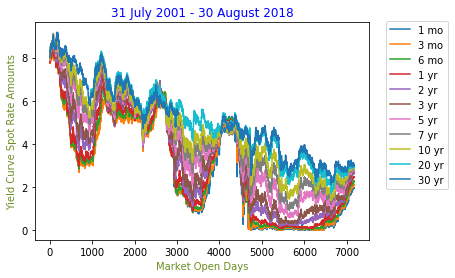

In [43]:
plt.plot (one_month)
plt.plot (three_month)
plt.plot (six_month)
plt.plot (one_year)
plt.plot (two_year)
plt.plot (three_year)
plt.plot (five_year)
plt.plot (seven_year)
plt.plot (ten_year)
plt.plot (twenty_year)
plt.plot (thirty_year)
plt.xlabel ('Market Open Days', color='olivedrab')
plt.ylabel ('Yield Curve Spot Rate Amounts', color='olivedrab')
plt.title ('31 July 2001 - 30 August 2018', color='blue')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.03)) 

# K - Means Clustering Algorithm

Text to Added about K - Means

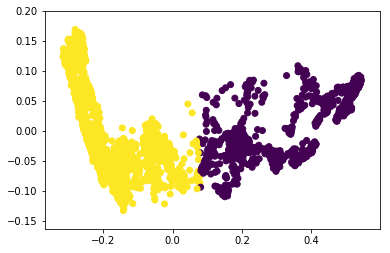

In [44]:
# K-Means begins by normalization of the data
X_norm = normalize(dfylds)

# Reduce it to 10 maturity points instead of 11 . . . maybe change 10 to 2?
X_pca = PCA(10).fit_transform(X_norm)

# Calculate predicted values . . . change random state to 100?
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution . . . how does one interpret the blobs below?
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Means Shift Clustering Algorithm

Text to be added

In [45]:
# Set the bandwidth
bandwidth = estimate_bandwidth(dfylds, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(dfylds)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


In [46]:
#plt.scatter(x argument to put here, y argument to put here, c=labels)
#plt.show()

# print('Comparing the assigned categories to the ones in the data:')
# print(pd.crosstab(???,labels))

# Spectral Clustering Algorithm

Text to be added

In [47]:
# Two clusters of the yield curve
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(dfylds)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [50]:
#Predicted clusters . . . Need to look into this
predict=sc.fit_predict(dfylds)

predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

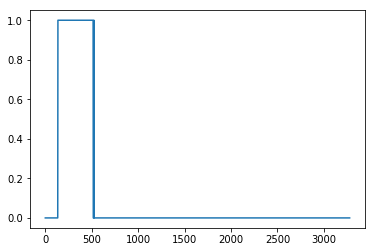

In [51]:
plt.plot (predict)

# Affinity Propagation Clustering Algorithm

Text to be added

In [59]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(dfylds)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 343


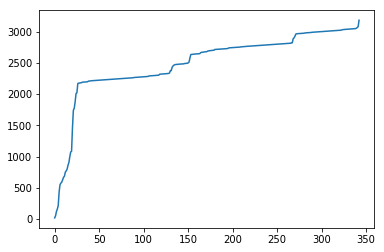

In [60]:
# Need some work . . .
plt.plot (cluster_centers_indices)

# Mahalanobis Distance

Text to be added

In [62]:
from scipy.spatial.distance import mahalanobis

In [63]:
# Worry about this later, may need to drop a vector, a maturity point of the eleven for covariance matrix